# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Guilherme Leite </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon ,norm

In [4]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [5]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [6]:
df['Hemisfério']=""

for linha in range(len(df)):
    if df["Latitude"][linha] >= 0: 
        df.at[linha, 'Hemisfério'] = "Norte"
    else:
        df.at[linha, 'Hemisfério'] = "Sul"

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

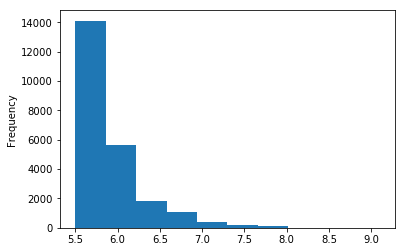

In [40]:
df["Magnitude"].plot.hist()

A grande maioria das magnitudes esta entre 5.5 e 6 graus.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

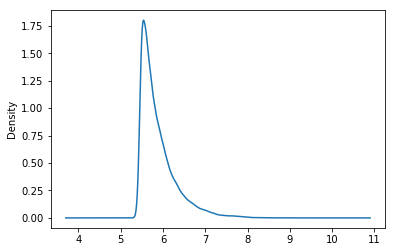

In [42]:
df["Magnitude"].plot.density()

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [8]:
HemTyp = pd.crosstab(df.Hemisfério, df.Type, normalize = True)
print(HemTyp)

Type        Earthquake  Explosion  Nuclear Explosion  Rock Burst
Hemisfério                                                      
Norte         0.447164   0.000085           0.006279    0.000000
Sul           0.545148   0.000085           0.001196    0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [9]:
Total = HemTyp['Earthquake'].sum()
TotalNorte = HemTyp['Earthquake'][0]
PNorte = TotalNorte/Total
print(PNorte)

0.450628443526


Explique o seu raciocínio

A probabilidade de ocorrer um terremoto no hemisfério Norte é: o total de ocorrências que ocorreram no Norte dividido pelo total.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [10]:
VC = df['Hemisfério'].value_counts()
TotalN = VC['Norte']
NukeN = HemTyp['Nuclear Explosion'][0]*len(df)

PNE = NukeN/TotalN
print(PNE)

0.0138444151441


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

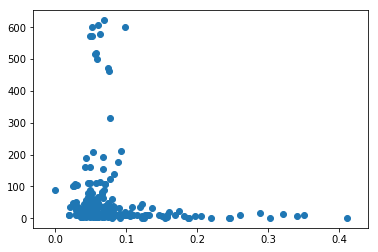

In [11]:
plt.scatter(df['Magnitude Error'],df['Depth'] )
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [12]:
df['Magnitude Error'].corr(df['Depth'])

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

Significa que a grande maioria dos valores estão relativamente próximos

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [13]:
df['Latitude'].describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

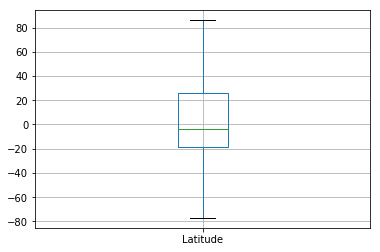

In [14]:
df.boxplot(column=['Latitude'], return_type='axes')
plt.show()

A media dos valores de Latitude é de 1.679033 e 50% deles estão entre -18.653000 e 26.190750.

In [15]:
df['Longitude'].describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

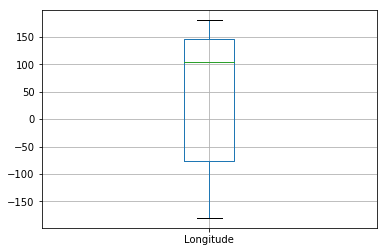

In [16]:
df.boxplot(column=['Longitude'], return_type='axes')
plt.show()

A media dos valores de Longitude é de 39.639961 graus e 50% deles estão entre -76.349750 e 145.026250.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [19]:
Norte = df.loc[(df['Hemisfério'] == 'Norte')]
Sul  = df.loc[(df['Hemisfério'] == 'Sul')]

MagTypN = pd.crosstab(Norte['Magnitude Type'], Norte['Type'])
print(MagTypN,"\n")
MagTypS= pd.crosstab(Sul['Magnitude Type'], Sul['Type'])
print(MagTypS)


Type            Earthquake  Explosion  Nuclear Explosion
Magnitude Type                                          
MB                    1547          2                135
MD                       6          0                  0
MH                       5          0                  0
ML                      65          0                 12
MS                     767          0                  0
MW                    3684          0                  0
MWB                   1112          0                  0
MWC                   2389          0                  0
MWR                     12          0                  0
MWW                    879          0                  0 

Type            Earthquake  Explosion  Nuclear Explosion  Rock Burst
Magnitude Type                                                      
MB                    2047          2                 28           0
MS                     935          0                  0           0
MW                    4038          0 

In [68]:
N = 163/3594

S = 28/2047

print("Norte \n",N,"Sul",S)

Norte 
 0.04535336672231497 Sul 0.013678553981436248


É mais provavel que tenha sido no Norte, pois a proporção Nuclear Explosion/Magnitude Type MB é quase quatro vezes maior que a do Sul.